In [12]:
import pickle
import numpy as np
import math as mt
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from skimage import io
import os
from collections import Counter
import keras
%matplotlib inline

Using TensorFlow backend.


In [3]:
def get_edges_ged_rad(skel_features):
    edges_x = []
    edges_y = []
    degs = set()
    rads = set()
    for i, d in enumerate(skel_features):
        if i % 4 == 0:
            edges_x.append(d)
        if i % 4 == 1:
            edges_y.append(d)
        if i % 4 == 2:
            degs.add((edges_x[-1], edges_y[-1], d))
        if i % 4 == 3:
            rads.add((edges_x[-1], edges_y[-1], d))
    
    return edges_x, edges_y, list(degs), list(rads)

def draw_skeleton(image, features):
    res_x, res_y, res_deg, res_rad = get_edges_ged_rad(features)
    
    fig = plt.figure(figsize=(18, 8))

    ax = fig.add_subplot(121)
    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.text(x, s - y, str(int(d)), fontsize=16, color="red")

    ax = fig.add_subplot(122)

    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
        circle = plt.Circle((x, s - y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.add_patch(circle)

    fig.show()

In [18]:
with open("../data/train_info", "rb") as fin:
    data = pickle.load(fin)
    X_train, y_train, X_train_skel_features = data["data"], data["labels"], data["skel_features"]

X_test, y_test, X_test_skel_features = None, None, None
with open("../data/test_info", "rb") as fin:
    data = pickle.load(fin)
    X_test, y_test, X_test_skel_features = data["data"], data["labels"], data["skel_features"]
    
    
x_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
x_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
input_shape_cnn = (1, 28, 28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

s = int(np.sqrt(X_train.shape[1]))

In [14]:
x_train_skel_features = np.load('../data/x_train_skel_features.npy')
x_test_skel_features = np.load('../data/x_test_skel_features.npy')

# Нарисовать цифру под номером index

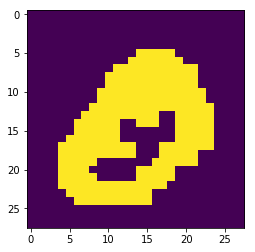

1.0 0.0 float32
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


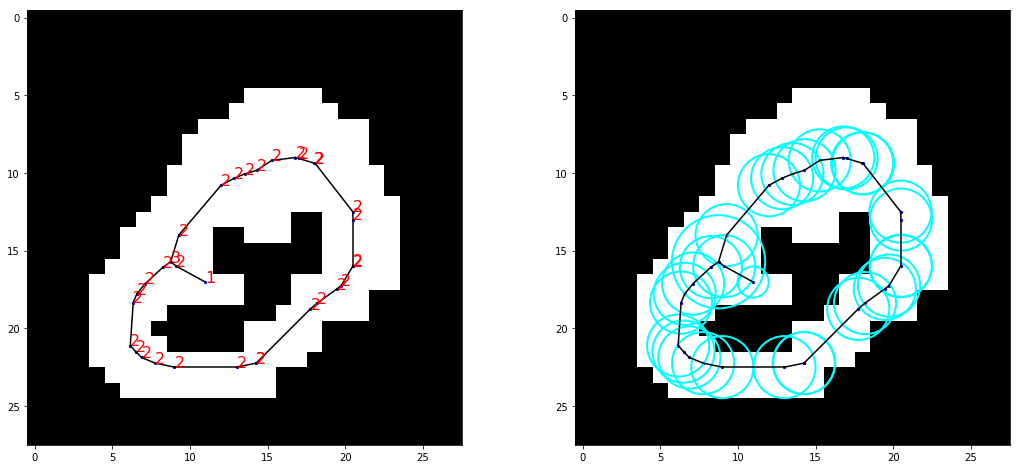

In [31]:
index = 6

plt.imshow(x_train[index, 0, :,:])
plt.show()
print(np.max(x_train[index,0, :,:]), np.min(x_train[index,0, :,:]), np.dtype(np.max(x_train[index,0, :,:])))
print(y_train[index])
print(np.argmax(y_train[index]))
draw_skeleton(X_train[6, :], X_train_skel_features[6])